In [1]:
import json
import fileinput

In [2]:
# see https://stackoverflow.com/questions/20400818/python-trying-to-deserialize-multiple-json-objects-in-a-file-with-each-object-s

def load_json_multiple(segments):
    chunk = ""
    for segment in segments:
        chunk += segment
        try:
            yield json.loads(chunk)
            chunk = ""
        except ValueError:
            pass


In [3]:
privates = {}

In [5]:
with fileinput.input("feed-2018-04-07.txt") as f:
   for parsed_json in load_json_multiple(f):
       value = parsed_json['value']
       if "content" in value and isinstance(value['content'], str):
           if value['content'].endswith(".box"):
                author = value['author']
                timestamp = value['timestamp']
                contentlen = len(value["content"])
                if author not in privates:
                    privates[author] = {"times" : [timestamp], 'lengths' : [contentlen]}
                else:
                    privates[author]["times"].append(timestamp)
                    privates[author]["lengths"].append(contentlen)

In [6]:
me = "@RtsOc2h1gqh0fRrjrUTHAkRBu9YyDgsD+EWsfLpykrc=.ed25519"

In [7]:
privates[me]

{'lengths': [456,
  732,
  544,
  696,
  376,
  408,
  1076,
  420,
  600,
  876,
  956,
  1284,
  1016,
  980,
  1800],
 'times': [1491831936223,
  1492029611422,
  1492029700009,
  1492029849310,
  1492627558295,
  1493425862371,
  1513566638823,
  1514772506378,
  1514778514745,
  1516370433687,
  1517918714401,
  1521220294389,
  1521896083657,
  1522192161508,
  1522338089668]}

In [9]:
%matplotlib inline

In [15]:
import pylab
import numpy as np

In [16]:
xmin, xmax = np.min(privates[me]["times"]), np.max(privates[me]["times"])

(1491831936223, 1522338089668)

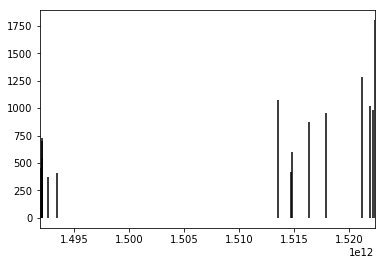

In [22]:
pylab.vlines(privates[me]["times"], privates[me]["lengths"], 0)
pylab.xlim(xmin,xmax)

In [12]:
israel = "@RDRnDaZhV5Yg1NWAN78D04iZtJ8hWrQoT5iBJfYcIpg=.ed25519"

(1491831936223, 1522338089668)

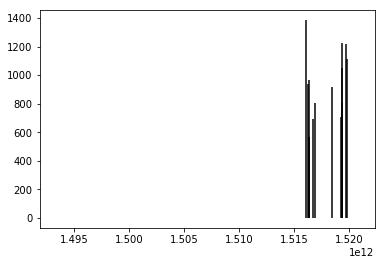

In [23]:
pylab.vlines(privates[israel]["times"], privates[israel]["lengths"],0)
pylab.xlim(xmin,xmax)

In [24]:
imin, imax = np.min(privates[israel]["times"]), np.max(privates[israel]["times"])

(1516109802045, 1519870653849)

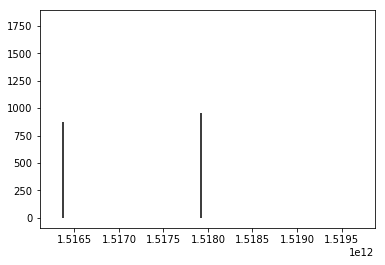

In [25]:
pylab.vlines(privates[me]["times"], privates[me]["lengths"], 0)
pylab.xlim(imin,imax)

(1516109802045, 1519870653849)

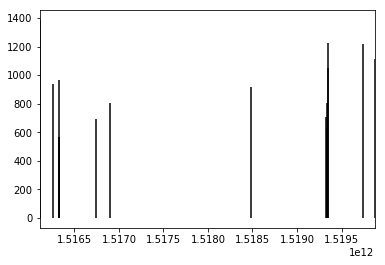

In [26]:
pylab.vlines(privates[israel]["times"], privates[israel]["lengths"],0)
pylab.xlim(imin,imax)

In [28]:
kas = "@dBQlwh9Gtr3i5YMOGtIOKtGNVepeu+nyb6KGl1vtOcM=.ed25519"

(1491831936223, 1522338089668)

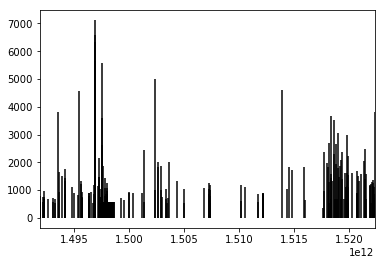

In [30]:
pylab.vlines(privates[kas]["times"], privates[kas]["lengths"],0)
pylab.xlim(xmin,xmax)